In [1]:
conda install -c conda-forge scikit-plot

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 4.14.0
  latest version: 22.11.1

Please update conda by running

    $ conda update -n base -c conda-forge conda




In [2]:
#Let's start with importing necessary libraries

import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skl
sns.set()

In [3]:
data = pd.read_csv("D:\Study\Data Science\Python\ineuron\Data_Set\diabetes.csv") # Reading the Data
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Exploratory data analysis of Diabetest dataset

In [4]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
# To check the datatype of each features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# To check the null values in dataset
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


There is No missing values in the data

C:\Users\Ravi0dubey\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ravi0dubey\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ravi0dubey\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplo

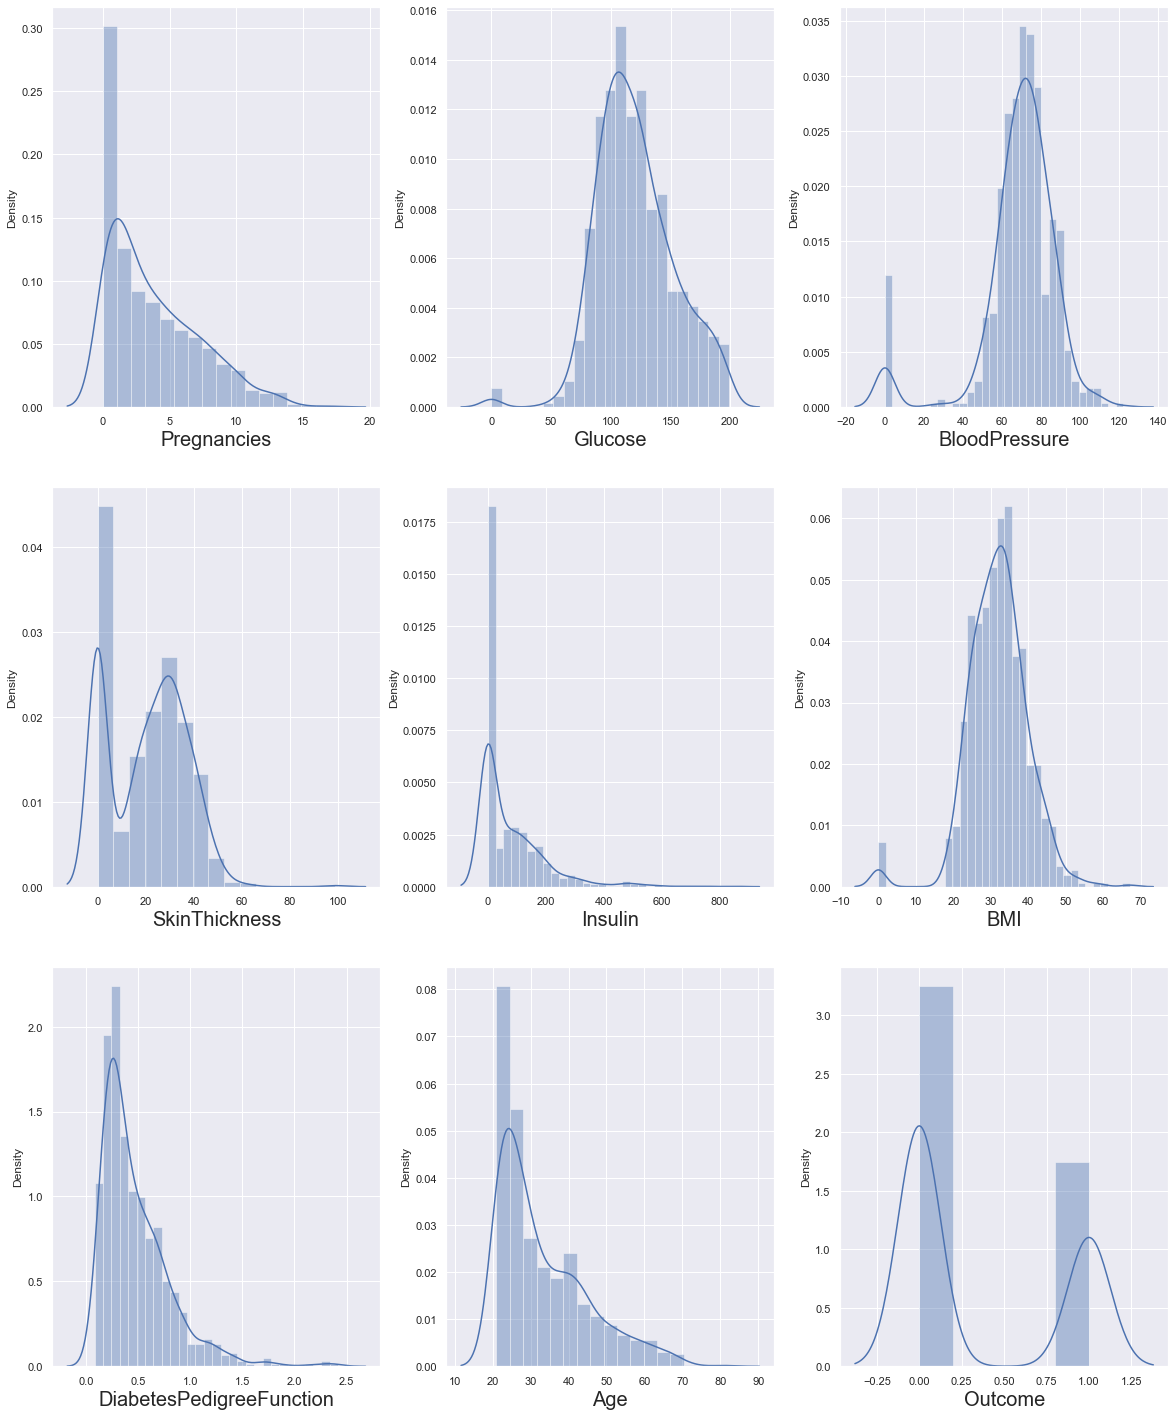

In [8]:
# Let see how the data is distributed for every column

plt.figure(figsize = (20,25), facecolor = 'white')
plotnumber = 1

for column in data:
    if plotnumber <= 9: # since we have 9 columns in dataset
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        plotnumber +=1
        
plt.show()

There are skewness in the data
Few data for the columns Glucose, Insulin, Skin thickness, BMI and Blood Pressure has value of 0.
We will replace it with mean values.


In [9]:
# Check how many zeros we have in each column

print(f"number of zeros in Glucose Feature : {(data['Glucose']==0).sum()}")
print(f"number of zeros in Insulin Feature : {(data['Insulin']==0).sum()}")
print(f"number of zeros in SkinThickness Feature : {(data['SkinThickness']==0).sum()}")
print(f"number of zeros in BMI Features : {(data['BMI']==0).sum()}")
print(f"number of zeros in BloodPressure Feature : {(data['BloodPressure']==0).sum()}")

number of zeros in Glucose Feature : 5
number of zeros in Insulin Feature : 374
number of zeros in SkinThickness Feature : 227
number of zeros in BMI Features : 11
number of zeros in BloodPressure Feature : 35


In [10]:
# Replacing zeros with Mean of each column

data['Glucose']= data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin']= data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness']= data['SkinThickness'].replace(0,data['SkinThickness'].mean())
data['BMI']= data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure']= data['BloodPressure'].replace(0,data['BloodPressure'].mean())

In [11]:
# Check how many zeros we have in each column after zero replace

print(f"number of zeros in Glucose Feature : {(data['Glucose']==0).sum()}")
print(f"number of zeros in Insulin Feature : {(data['Insulin']==0).sum()}")
print(f"number of zeros in SkinThickness Feature : {(data['SkinThickness']==0).sum()}")
print(f"number of zeros in BMI Features : {(data['BMI']==0).sum()}")
print(f"number of zeros in BloodPressure Feature : {(data['BloodPressure']==0).sum()}")

number of zeros in Glucose Feature : 0
number of zeros in Insulin Feature : 0
number of zeros in SkinThickness Feature : 0
number of zeros in BMI Features : 0
number of zeros in BloodPressure Feature : 0


In [12]:
# To check the datatype of each features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.000000,3.000000,6.00000,17.00
Glucose,768.0,121.681605,30.436016,44.000,99.750000,117.000000,140.25000,199.00
BloodPressure,768.0,72.254807,12.115932,24.000,64.000000,72.000000,80.00000,122.00
SkinThickness,768.0,26.606479,9.631241,7.000,20.536458,23.000000,32.00000,99.00
Insulin,768.0,118.660163,93.080358,14.000,79.799479,79.799479,127.25000,846.00
BMI,768.0,32.450805,6.875374,18.200,27.500000,32.000000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.243750,0.372500,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.000000,29.000000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.000000,0.000000,1.00000,1.00


C:\Users\Ravi0dubey\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ravi0dubey\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ravi0dubey\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplo

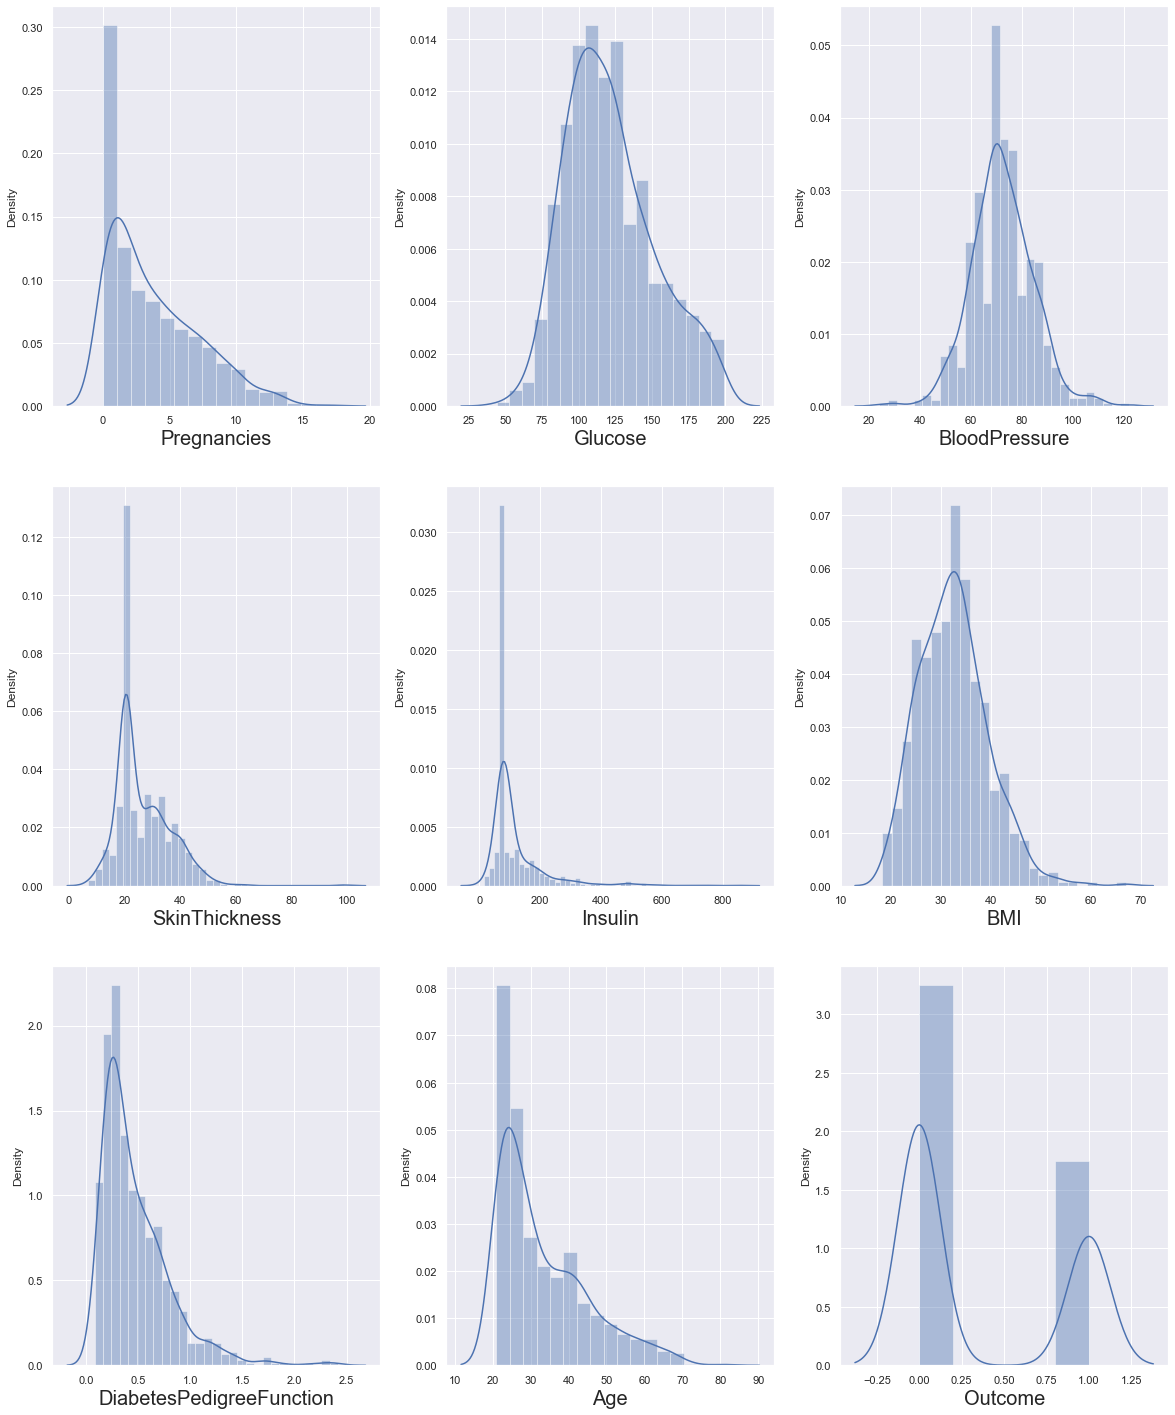

In [14]:
# Let see how the data is distributed for every column afer distribution

plt.figure(figsize = (20,25), facecolor = 'white')
plotnumber = 1

for column in data:
    if plotnumber <= 9: # since we have 9 columns in dataset
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        plotnumber +=1
        
plt.show()

<AxesSubplot:>

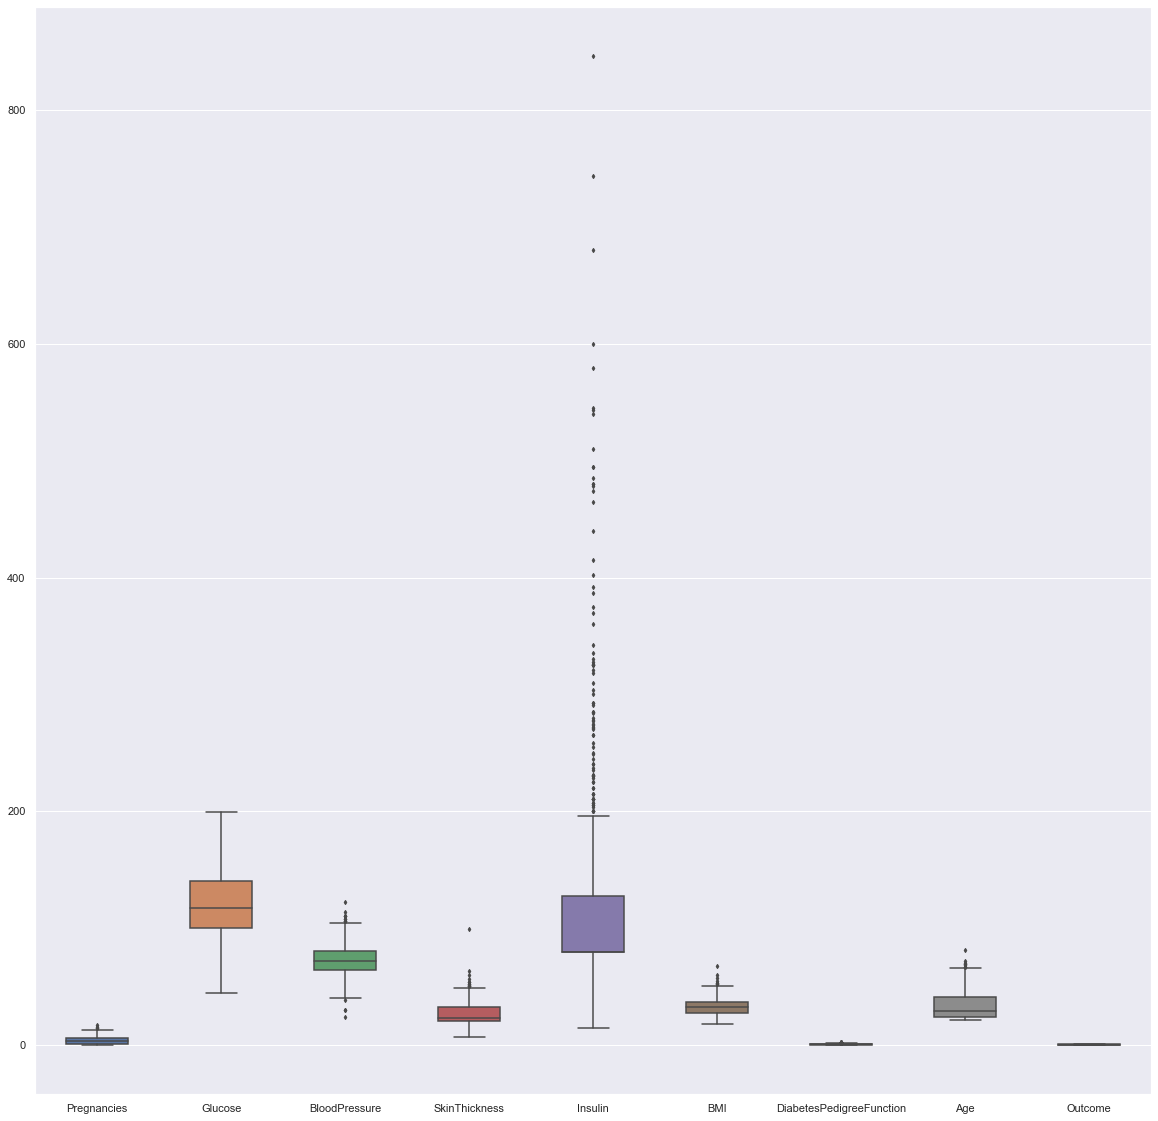

In [15]:
# Checking Outlier in the dataset
fig,ax= plt.subplots(figsize=(20,20))
sns.boxplot(data=data,width = 0.5,ax=ax,fliersize=3)

# Data Cleaning

In [16]:
#Removing Top 2% of the data from Pregnancies as it has outliers
q =data['Pregnancies'].quantile(0.98)
data_cleaned= data[data['Pregnancies']< q]

#Removing Top 1% of the data from BMI as it has outliers
q =data['BMI'].quantile(0.99)
data_cleaned= data[data['BMI']< q]

#Removing Top 1% of the data from SkinThickness as it has outliers
q =data['SkinThickness'].quantile(0.99)
data_cleaned= data[data['SkinThickness']< q]

#Removing Top 5% of the data from Insulin as it has outliers
q =data['Insulin'].quantile(0.95)
data_cleaned= data[data['Insulin']< q]

#Removing Top 1% of the data from DiabetesPedigreeFunction as it has outliers
q =data['DiabetesPedigreeFunction'].quantile(0.99)
data_cleaned= data[data['DiabetesPedigreeFunction']< q]

#Removing Top 1% of the data from Pregnancies as it has outliers
q =data['Age'].quantile(0.99)
data_cleaned= data[data['Age']< q]

<AxesSubplot:>

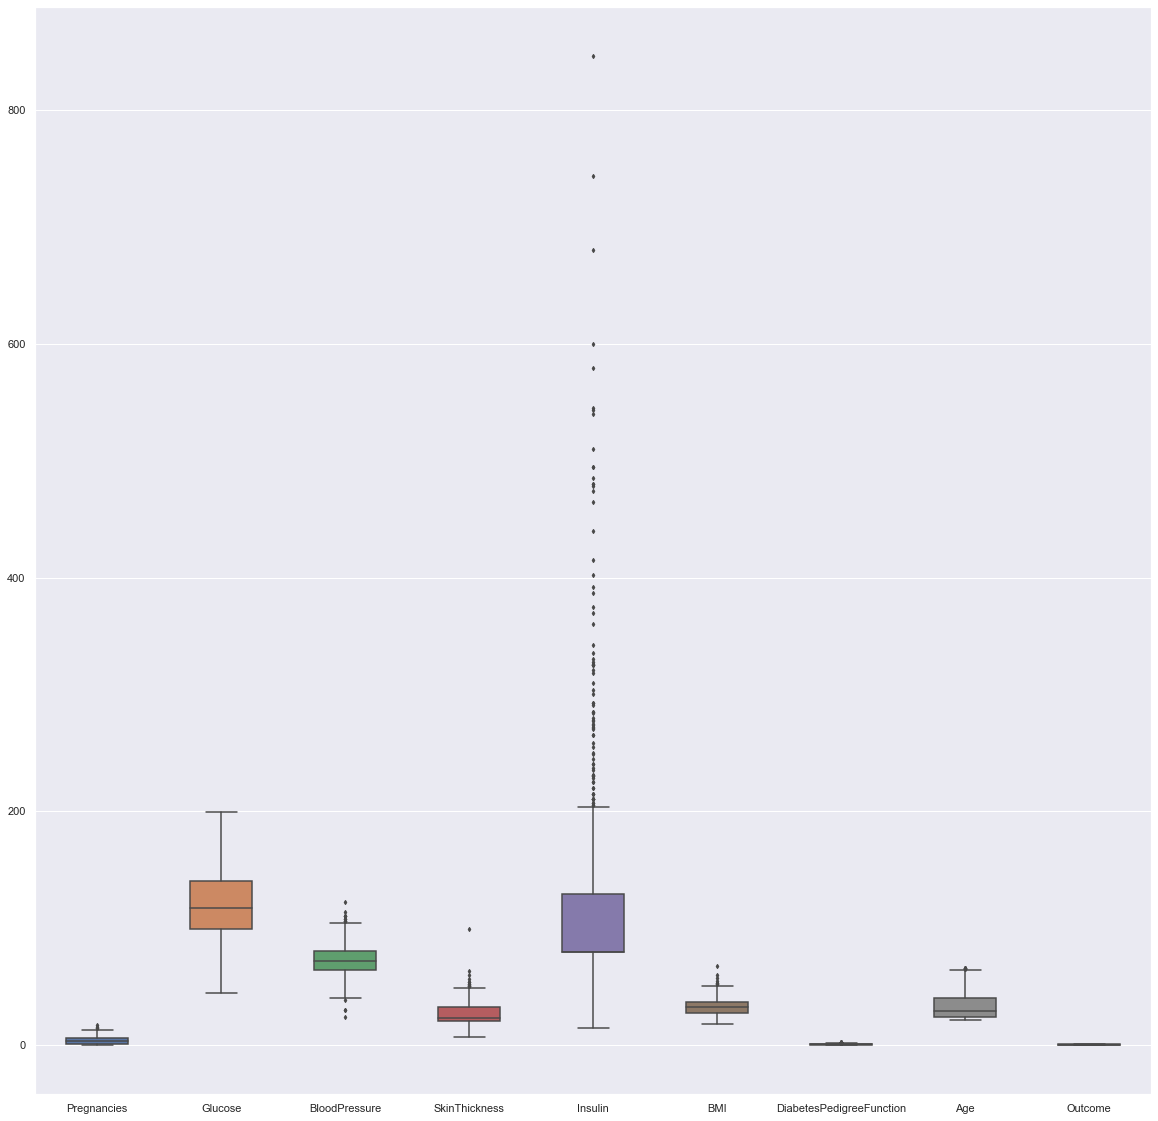

In [17]:
# Checking How data is distributed post outlier cleanup
fig,ax= plt.subplots(figsize=(20,20))
sns.boxplot(data=data_cleaned,width = 0.5,ax=ax,fliersize=3)

In [18]:
data.shape

(768, 9)

In [19]:
data_cleaned.shape

(759, 9)

The data looks much better now than before. 
we will start working with the data as we do not want to loose more information. In case our model does not give required accuracy, we will come back with more pre-processing of data.

## Data split into X and Y column

In [ ]:
# X will have all columns except Outcome Feature
# y will have only Outcome Feature

X = data_cleaned.drop(columns = ['Outcome'])
y= data_cleaned['Outcome']

C:\Users\Ravi0dubey\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ravi0dubey\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ravi0dubey\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\User

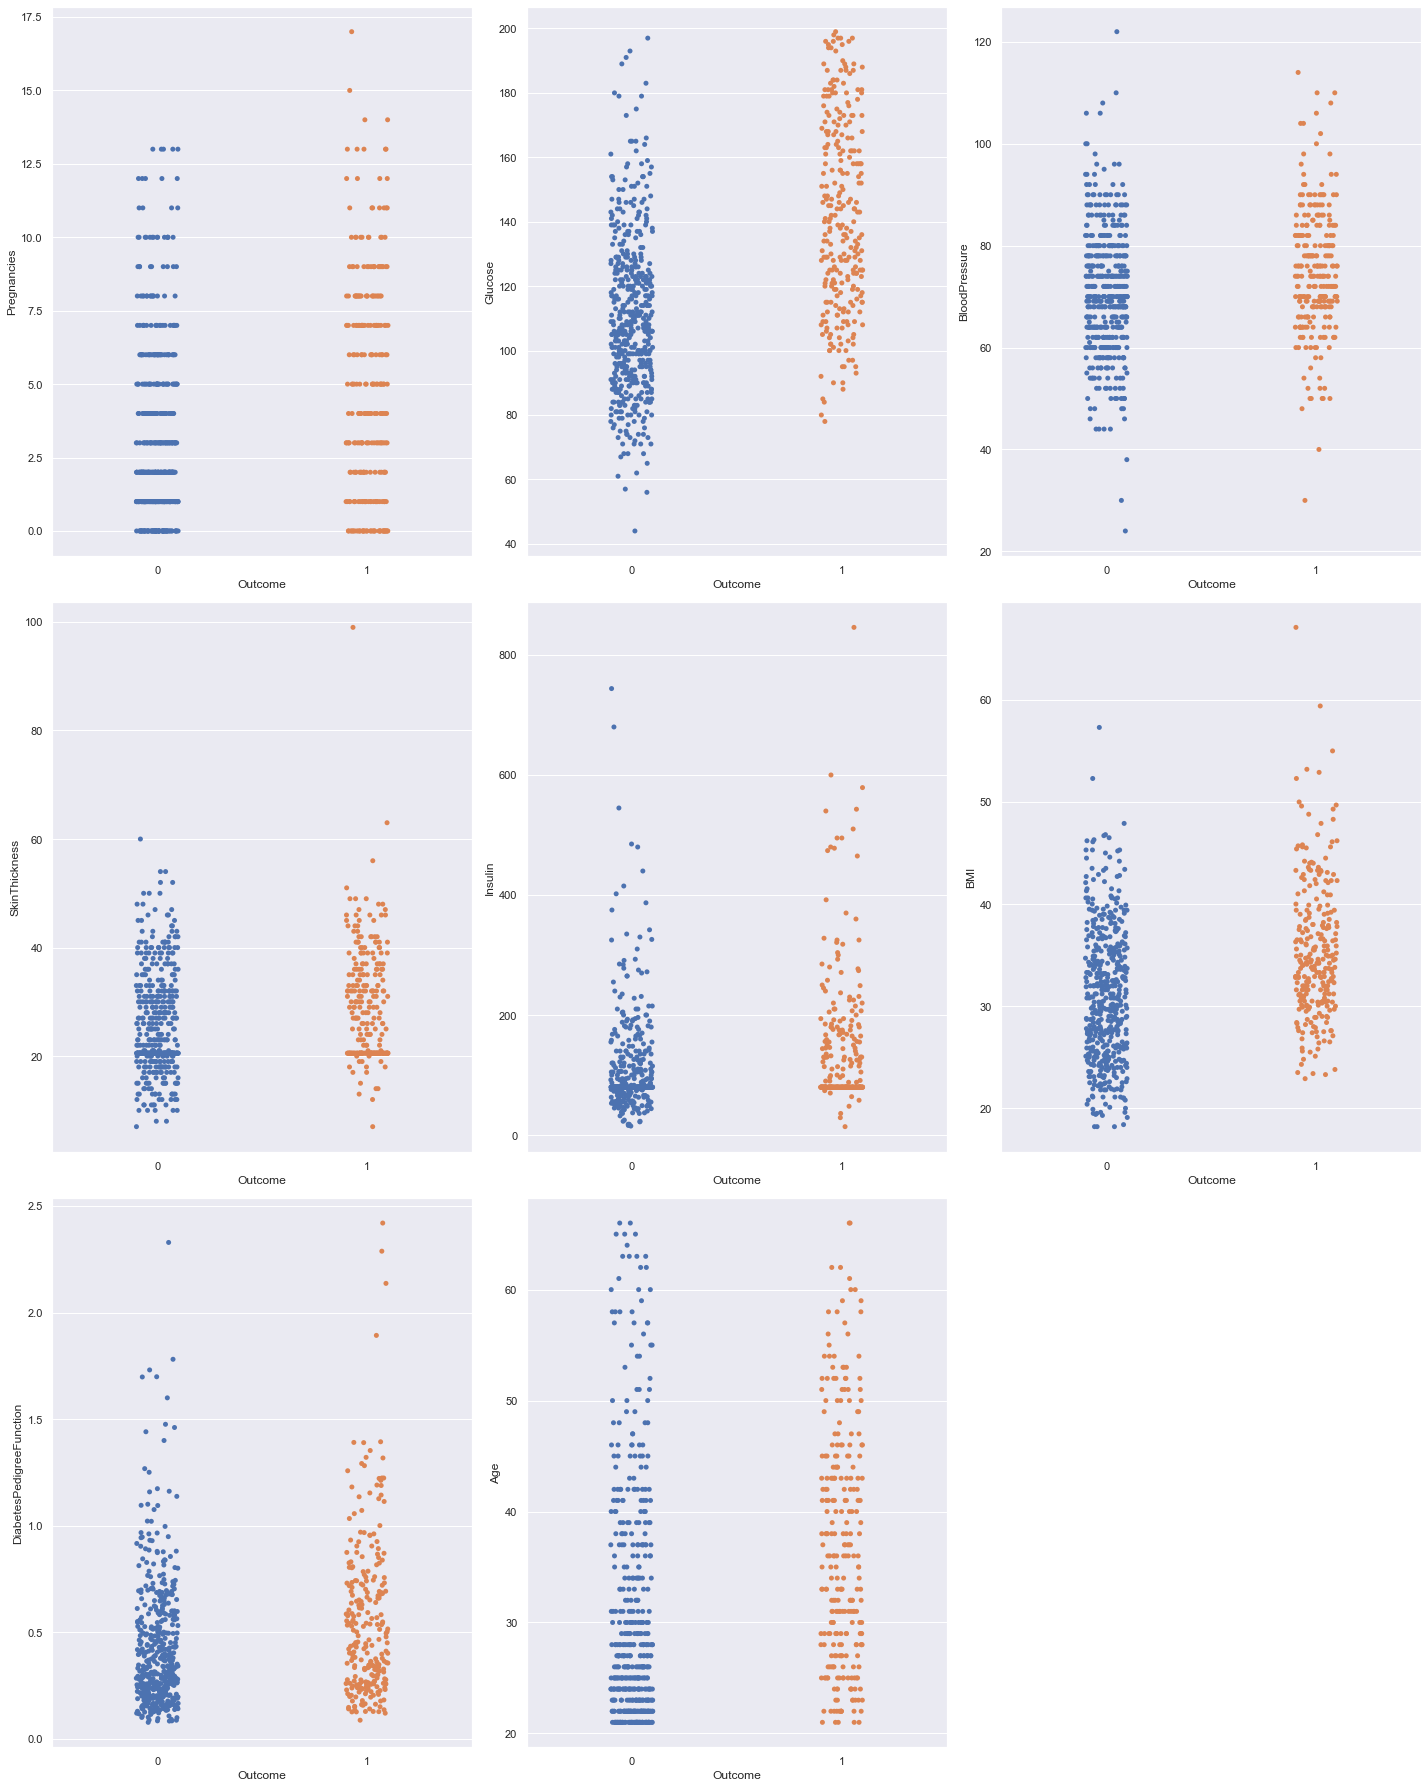

In [27]:
# Let see how the data is distributed for every column with respect to Outcome feature
plt.figure(figsize = (20,25), facecolor= 'white')
plotnumber = 1

for column in X:
    if plotnumber <=9:
        ax= plt.subplot(3,3,plotnumber)
        sns.stripplot(y,X[column])
        plotnumber +=1
plt.tight_layout()

## Scaling the data

In [44]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

## Checking Multicollinearity after Standardization operations
we will see the Variance Inflation Factor(VIF) score and if its greater than 10 then we know we have multicollienar feature which we will remove from our dataset

VIF = 1/(1-R2)


In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [38]:
#create a blank dataframe vif_df
vif_df = pd.DataFrame()
vif_df

""


In [45]:
#calculate vif for X_train_Scaled
vif_df['vif'] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]

In [46]:
#storing feature columns 
vif_df['feature']= X.columns

In [47]:
vif_df

,vif,feature
0,1.484572,Pregnancies
1,1.354580,Glucose
2,1.247898,BloodPressure
3,1.455095,SkinThickness
4,1.264776,Insulin
5,1.551161,BMI
6,1.058847,DiabetesPedigreeFunction
7,1.680199,Age


Observation : vif score is less than 10 for each features, we confirm there is no multicollinear data

### Splitting the data into Train and Test 

In [48]:
# Training dataset which will be used to train our model is stored in X_train and y_train
# Testing dataset which will be used to test our data or to get the score of the data, is stored in X_test and y_test

# test_size = 33% of data will be splitted and stored in test data
# random_state = it gives randomness of selection

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=10)

## Building Logistic Regression Model

In [49]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [67]:
# saving the model

import pickle

# writing different model files to file
with open('modelForPrediction.pkl','wb') as f:
    pickle.dump(log_reg,f)
with open('standardscalar.sav','wb') as f:
    pickle.dump(scalar,f)

In [68]:
# Load the model which was saved
with open('modelForPrediction.pkl','rb') as f:
    pickle.load(f)

## Testing the model

In [52]:
y_pred = log_reg.predict(X_test)

In [54]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[148,  18],
       [ 33,  52]], dtype=int64)

In [55]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [56]:
# we can calculate Accuracy by using below formula
Accuracy = (true_positive + true_negative ) / (true_positive + false_positive + false_negative + true_negative )
Accuracy

0.796812749003984

In [57]:
# We can calculate Accuracy by using function

accuracy = accuracy_score(y_test,y_pred)
accuracy

0.796812749003984

In [59]:
# We can calculate Precision by using Formula
Precision = (true_positive ) / (true_positive + false_positive)
Precision

0.891566265060241

In [60]:
# We can calculate Recall by using Formula
Recall = (true_positive ) / (true_positive + false_negative)
Recall

0.8176795580110497

In [62]:
# We can calculate Recall by using function
# here False Positive and False Negative are both important so using Beta value as 2

F1_Score = (2 * Recall * Precision)/(Recall+ Precision)
F1_Score

0.8530259365994235

In [63]:
# Area under the Curve
auc = roc_auc_score(y_test,y_pred)
auc

0.751665485471297